## Exercise 1
### Question 2

In [1]:
import pandas as pd
import numpy as np

In [2]:
def generate_output_data(X):
    """
        Generate the output set Y based on the Bernoulli probablity set in Question 1
        Parameters:
            X: The input set
    """

    # output data
    n = X.shape[0]
    #d = 1
    Y = []
    for i in range(n):
        if X[i] == 0:
            Y.append(2 * np.random.binomial(1, 1 / 4) - 1)
        if X[i] == 1:
            Y.append(2 * np.random.binomial(1, 2 / 5) - 1)
        if X[i] == 2:
            Y.append(2 * np.random.binomial(1, 1 / 3) - 1)
        if X[i] == 3:
            Y.append(2 * np.random.binomial(1, 3 / 4) - 1)
        if X[i] == 4:
            Y.append(2 * np.random.binomial(1, 5 / 6) - 1)
        if X[i] == 5:
            Y.append(2 * np.random.binomial(1, 7 / 8) - 1)
    return np.array(Y)[:,None]

### Exact Bayes' estimator

In [3]:
## BONUS
def f_star(X):
    Y_pred = []
    for x in X:
        if x < 3:
            Y_pred.append(-1)
        else:
            Y_pred.append(1)
    return np.array(Y_pred)[:, None]

### Another estimator
This estimator at large sample will imitate the behavior of the Bayes estimator where it chooses the optimal outcome based on the frequency for each X input
It uses mode to achieve this behavior

In [4]:
def find_mode(X, Y):
    mode = []
    for i in range(6):
        mode.append(pd.Series(Y[X == i]).value_counts().index[0])
    return mode

def f_tilda_mode(X, mode):
    Y_pred = []
    for x in X:
        Y_pred.append(mode[int(x)])
    return np.array(Y_pred)[:, None]

### Another estimator (2)
This estimator at large sample will return a risk of 0.5 due to the fact that it basically chooses randomly each time between 1 or -1 with the help of `random.getrandbits(1)`


In [5]:
import random 
def f_tilda_random(X):
    Y_pred = []
    for x in X:
        y_pred = 1 if bool(random.getrandbits(1)) else -1
        Y_pred.append(y_pred)
    return np.array(Y_pred)[:, None]

### Generating the simulation

In [6]:
n = 1000000
d = 1

X = np.random.randint(0, 6, (n, d))
Y = generate_output_data(X)
mode = find_mode(X, Y)

In [7]:
bayes_risk = 1/6 * (1/4 + 2/5 + 1/3 + 1/4 + 1/6 + 1/8) # Exact Bayes' Risk

In [8]:
Y_pred_random = f_tilda_random(X)
Y_pred_star = f_star(X)
empirical_risk_tilda = (Y != Y_pred_random).mean() # Empirical risk for the given n samples (f_tilda)
empirical_risk_star = (Y != Y_pred_star).mean() # Empirical risk for the given n samples (f_star)

In [9]:
empirical_risk_tilda, bayes_risk, empirical_risk_star

(0.499297, 0.25416666666666665, 0.253948)

### Monte Carlo simulation
This simulation demonstrates that as the number of samples increases the empirical risks of the Bayes' estimator will converge to the exact Bayes' risk which is calculated in question 1

In [10]:
empirical_risks = []
n_test = 1000
for i in range(1, n_test):
    n = i
    d = 1

    X = np.random.randint(0, 6, (n, d))
    Y = generate_output_data(X)
    Y_pred_star = f_star(X)
    empirical_risks.append((Y != Y_pred_star).mean())

    

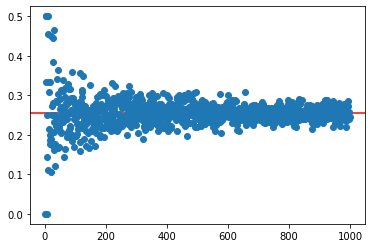

In [11]:
import matplotlib.pyplot as plt
plt.axhline(y=bayes_risk, color='r', linestyle='-')
plt.plot([x for x in range (1, n_test)], empirical_risks, 'o')
plt.show()